# Data Preparation

## Loading Data and Libraries

In [1]:
import unidecode
import os
import sys

sys.path.append('../src/')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

%matplotlib inline
%load_ext autoreload
%autoreload 2

DATAPATH = '../data/'

In [2]:
df_linf = pd.read_csv(os.path.join(DATAPATH, 'raw', 'preprocessed', 'linfomas_apac.csv'), low_memory=False, index_col=0)

In [3]:
df_linf.shape

(38472, 134)

In [4]:
df_linf.head(5)

,dt_process_quim,tp_gestao_quim,cod_tp_gestao_quim,cod_est_cnes_quim,num_apac_quim,dt_atend_paciente_quim,proc_princ_apac_quim,vl_tot_apac_aprov_quim,cod_uf_mun_quim,tp_est_quim,tip_prest_quim,est_man_ind_quim,cnpj_est_exe_quim,cnpj_mante_quim,cod_idade_quim,num_idade_quim,sexo_quim,raca_cor_quim,cod_uf_mun_paciente_quim,nac_paciente_quim,cep_paciente_quim,uf_res_dif_paciente_quim,mun_res_dif_paciente_quim,dt_ini_val_quim,dt_fim_val_quim,tp_atend_apac_quim,ind_apac_quim,mot_sai_perm_quim,ind_obito_quim,ind_encerr_quim,ind_perm_quim,ind_alta_quim,ind_transf_quim,dt_ocorr_quim,cod_org_emi_quim,car_atend_quim,num_apac_ant_quim,cod_soli_cnes_quim,dt_soli_quim,dt_auto_quim,cid_caus_assoc_quim,cid_princ_quim,cid_sec_quim,etnia_quim,aq_cid_10,aq_linfo_reg_inva,aq_estadi,aq_grahis,aq_dt_inden_pato,aq_trat_anter,aq_cidini1,aq_dt_ini_1_trat,aq_cidini2,aq_dt_ini_2_trat,aq_cidini3,aq_dt_ini_3_trat,aq_cont_trat,aq_dt_inic_trat_soli,aq_esqu_p1,aq_tot_mes_plan,aq_tot_mes_aut,aq_esu_p2,dt_process_rad,tp_gestao_rad,cod_tp_gestao_rad,cod_est_cnes_rad,num_apac_rad,dt_atend_paciente_rad,proc_princ_apac_rad,vl_tot_apac_aprov_rad,cod_uf_mun_rad,tp_est_rad,tip_prest_rad,est_man_ind_rad,cnpj_est_exe_rad,cnpj_mante_rad,cod_idade_rad,num_idade_rad,sexo_rad,raca_cor_rad,cod_uf_mun_paciente_rad,nac_paciente_rad,cep_paciente_rad,uf_res_dif_paciente_rad,mun_res_dif_paciente_rad,dt_ini_val_rad,dt_fim_val_rad,tp_atend_apac_rad,ind_apac_rad,mot_sai_perm_rad,ind_obito_rad,ind_encerr_rad,ind_perm_rad,ind_alta_rad,ind_transf_rad,dt_ocorr_rad,cod_org_emi_rad,car_atend_rad,num_apac_ant_rad,cod_soli_cnes_rad,dt_soli_rad,dt_auto_rad,cid_caus_assoc_rad,cid_princ_rad,cid_sec_rad,etnia_rad,ar_smrd,ar_cid_10,ar_linfo_reg_inva,ar_estadi,ar_grahis,ar_dt_inden_pato,ar_trat_anter,ar_cidini1,ar_dt_ini_1_trat,ar_cidini2,ar_dt_ini_2_trat,ar_cidini3,ar_dt_ini_3_trat,ar_cont_trat,ar_dt_inic_trat_soli,ar_finalid_trat,ar_cid_topo_1,ar_cid_topo_2,ar_cid_topo_3,ar_num_ins_1,ar_dt_ini_1,ar_dt_ini_2,ar_dt_ini_3,ar_dt_fim_1,ar_dt_fim_2,ar_dt_fim_3,ar_num_ins_2,ar_num_ins_3
num_csn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,2014-02,EP,120000.0,2001586.0,1.214200e+12,2014-02,304060011.0,1258.64,120040.0,5.0,40.0,I,6.360294e+13,NaN,4.0,24.0,F,3.0,120040.0,10.0,69901024.0,0.0,1.0,2014-02-07,2014-04-30,3.0,1.0,21.0,0.0,0.0,1.0,0.0,0.0,NaN,E120000001,1.0,0000000000000,2001586,2014-02-07,2014-02-07,0000,C81- Linfoma de Hodgkin,0000,NaN,NaN,3,3.0,99,2014-01-23,0,NaN,NaN,NaN,NaN,NaN,NaN,N,2014-02-07,ABVD,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2014-04,EP,120000.0,2001586.0,1.214200e+12,2014-04,304060011.0,1258.64,120040.0,5.0,40.0,I,6.360294e+13,NaN,4.0,48.0,M,3.0,120040.0,10.0,69900970.0,0.0,1.0,2014-04-10,2014-06-30,3.0,1.0,21.0,0.0,0.0,1.0,0.0,0.0,NaN,E120000001,1.0,0000000000000,2001586,2014-04-10,2014-04-10,0000,C81- Linfoma de Hodgkin,0000,NaN,NaN,3,2.0,99,2014-03-12,0,NaN,NaN,NaN,NaN,NaN,NaN,N,2014-04-10,ABVD,6.0,0.0,NaN,2015-04,EP,110000.0,2515377.0,1.115200e+12,2015-04,304010090.0,739.0,110020.0,36.0,22.0,I,1.068099e+12,NaN,4.0,49.0,M,2.0,120040.0,10.0,69900001.0,1.0,1.0,2015-04-14,2015-06-30,4.0,1.0,12.0,0.0,0.0,0.0,1.0,0.0,2015-04-24,E110000001,1.0,0.0,0.0,2015-04-14,2015-05-05,0000,C81- Linfoma de Hodgkin,C770,NaN,NaN,C819,S,2.0,X,2014-03-12,NaN,C819,2015-02-11,NaN,NaN,NaN,NaN,N,2015-04-14,1.0,C770,C770,NaN,2.0,20150414.0,20150414.0,NaN,2015-06-30,2015-06-30,NaN,2.0,NaN
10,2014-08,EP,120000.0,2001586.0,1.214200e+12,2014-07,304060011.0,1258.64,120040.0,5.0,40.0,I,6.360294e+13,NaN,4.0,35.0,F,3.0,120040.0,10.0,69900970.0,0.0,1.0,2014-07-25,2014-09-30,3.0,1.0,21.0,0.0,0.0,1.0,0.0,0.0,NaN,E120000001,1.0,0000000000000,2001586,2014-07-25,201

## Ajuste dos tipos

### Datas

In [5]:
dtcols = [c for c in df_linf.columns if 'dt_' in c]
dtcols

['dt_process_quim',
 'dt_atend_paciente_quim',
 'dt_ini_val_quim',
 'dt_fim_val_quim',
 'dt_ocorr_quim',
 'dt_soli_quim',
 'dt_auto_quim',
 'aq_dt_inden_pato',
 'aq_dt_ini_1_trat',
 'aq_dt_ini_2_trat',
 'aq_dt_ini_3_trat',
 'aq_dt_inic_trat_soli',
 'dt_process_rad',
 'dt_atend_paciente_rad',
 'dt_ini_val_rad',
 'dt_fim_val_rad',
 'dt_ocorr_rad',
 'dt_soli_rad',
 'dt_auto_rad',
 'ar_dt_inden_pato',
 'ar_dt_ini_1_trat',
 'ar_dt_ini_2_trat',
 'ar_dt_ini_3_trat',
 'ar_dt_inic_trat_soli',
 'ar_dt_ini_1',
 'ar_dt_ini_2',
 'ar_dt_ini_3',
 'ar_dt_fim_1',
 'ar_dt_fim_2',
 'ar_dt_fim_3']

In [6]:
df_linf[dtcols].head(3)

,dt_process_quim,dt_atend_paciente_quim,dt_ini_val_quim,dt_fim_val_quim,dt_ocorr_quim,dt_soli_quim,dt_auto_quim,aq_dt_inden_pato,aq_dt_ini_1_trat,aq_dt_ini_2_trat,aq_dt_ini_3_trat,aq_dt_inic_trat_soli,dt_process_rad,dt_atend_paciente_rad,dt_ini_val_rad,dt_fim_val_rad,dt_ocorr_rad,dt_soli_rad,dt_auto_rad,ar_dt_inden_pato,ar_dt_ini_1_trat,ar_dt_ini_2_trat,ar_dt_ini_3_trat,ar_dt_inic_trat_soli,ar_dt_ini_1,ar_dt_ini_2,ar_dt_ini_3,ar_dt_fim_1,ar_dt_fim_2,ar_dt_fim_3
num_csn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,2014-02,2014-02,2014-02-07,2014-04-30,NaN,2014-02-07,2014-02-07,2014-01-23,NaN,NaN,NaN,2014-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2014-04,2014-04,2014-04-10,2014-06-30,NaN,2014-04-10,2014-04-10,2014-03-12,NaN,NaN,NaN,2014-04-10,2015-04,2015-04,2015-04-14,2015-06-30,2015-04-24,2015-04-14,2015-05-05,2014-03-12,2015-02-11,NaN,NaN,2015-04-14,20150414.0,20150414.0,NaN,2015-06-30,2015-06-30,NaN
10,2014-08,2014-07,2014-07-25,2014-09-30,NaN,2014-07-25,2014-07-25,2014-06-30,NaN,NaN,NaN,2014-07-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
cols_to_date_month = ['dt_process_quim', 'dt_process_rad', 'dt_atend_paciente_quim', 'dt_atend_paciente_rad']
cols_to_date_day = list(set(dtcols) - set(cols_to_date_month))

In [8]:
df_linf[cols_to_date_day] = df_linf[cols_to_date_day].apply(lambda x: pd.to_datetime(x))
df_linf[cols_to_date_month] = df_linf[cols_to_date_month].apply(lambda x: pd.to_datetime(x).dt.to_period('M'))

### Objects (strings)

In [9]:
cat_cols = df_linf.select_dtypes('object').columns
df_linf[cat_cols] = df_linf[cat_cols].apply(lambda x: x.astype(str))

## Seleção dos dados considerando a precedência entre Quimioterapia e Radio
O dataset inicial apresenta colunas com o mesmo sentido, porém com informações da base de Quimioterapia e outra de Radioterapia. Muitas informações são duplicadas, pois representam atributos do mesmo paciente.
A seleção é feita para reduzir o tamanho e garantir corretude de aspectos temporais, dado que os tratamentos podem ter acontecidos em épocas diferentes. O objetivo é analisar os motivos do tratamento tardio, deixando para trabalhos futuros a análise do decorrer do tratamento, por este motivo, não há uma preocupação em manter ambas informações e nem granularidade de procedimentos. 

In [10]:
def identify_first(row):
    dt_first_ocurrence = None
    type_first_ocurrence = None
    dt_first_proccess = None
    type_first_proccess = None
    
    type_ = None
    
    # Se algum dos tratamentos for nulo, automaticamente adiciona o tratamento que tem valor
    # obs: sempre vai existir um com valor.
    if pd.isnull(row['dt_process_quim']):
        type_ = 'rad'
        dt_first_ocurrence = row['dt_process_rad']
        type_first_ocurrence = 'Radio'
        dt_first_proccess = row['dt_process_rad']
        type_first_proccess = 'Radio' 
    
    if pd.isnull(row['dt_process_rad']):
        type_ = 'quim'
        dt_first_ocurrence = row['aq_dt_inden_pato']
        type_first_ocurrence = 'Quimio'
        dt_first_proccess = row['dt_process_quim']
        type_first_proccess = 'Quimio'

    # Se apenas um for válido, já pode retornar
    if type_:
        return {'type_first_proccess': type_first_proccess, 'dt_process':dt_first_proccess, 'type_first_ocurrence': type_first_ocurrence, 'dt_inden_pato': dt_first_ocurrence}

    # caso exista ambos tratamentos, comparar datas para selecionar o primeiro tratamento
    else:    
        if row['aq_dt_inden_pato'] <= row['ar_dt_inden_pato']:
            dt_first_ocurrence = row['aq_dt_inden_pato']
            type_first_ocurrence = 'Quimio'
        else:
            dt_first_ocurrence = row['dt_process_rad']
            type_first_ocurrence = 'Radio'

        if row['dt_process_quim'] <= row['dt_process_rad']:
            dt_first_proccess = row['dt_process_quim']
            type_first_proccess = 'Quimio'
        else:
            dt_first_proccess = row['dt_process_rad']
            type_first_proccess = 'Radio' 

    return {'type_first_proccess': type_first_proccess, 'dt_process':dt_first_proccess, 'type_first_ocurrence': type_first_ocurrence, 'dt_inden_pato': dt_first_ocurrence}

In [11]:
df_linf_prev = df_linf.apply(identify_first, axis=1, result_type='expand')
df_linf = pd.concat([df_linf, df_linf_prev], axis=1)

In [12]:
df_linf.columns

Index(['dt_process_quim', 'tp_gestao_quim', 'cod_tp_gestao_quim',
       'cod_est_cnes_quim', 'num_apac_quim', 'dt_atend_paciente_quim',
       'proc_princ_apac_quim', 'vl_tot_apac_aprov_quim', 'cod_uf_mun_quim',
       'tp_est_quim',
       ...
       'ar_dt_ini_3', 'ar_dt_fim_1', 'ar_dt_fim_2', 'ar_dt_fim_3',
       'ar_num_ins_2', 'ar_num_ins_3', 'dt_inden_pato', 'dt_process',
       'type_first_ocurrence', 'type_first_proccess'],
      dtype='object', length=138)

#### Filtrar colunas em comum 
Selecionar colunas em comum nos tratamentos para construir um dataset unificado, com dimensionalidade reduzida e com foco no início do tratamento (independente de qual foi)

In [13]:
import re

regex_quim = re.compile(r'(^aq_|_quim$)')
regex_rad = re.compile(r'(^ar_|_rad$)')

quim_cols = list(filter(regex_quim.search, df_linf.columns))
rad_cols = list(filter(regex_rad.search, df_linf.columns))

quim_cols_transformed = [re.sub(r'(^aq_|_quim$)' , '', col) for col in quim_cols]
rad_cols_transformed = [re.sub(r'(^ar_|_rad$)' , '', col) for col in rad_cols]

In [14]:
# Mapeamento das colunas ajustadas para o valor original
dict_quim_cols = dict(zip(quim_cols_transformed, quim_cols))
dict_rad_cols = dict(zip(rad_cols_transformed, rad_cols))

In [15]:
# Atributos em comum em Quimio e Radio
common_cols = list(set(dict_quim_cols.keys()).intersection(dict_rad_cols.keys()))

In [16]:
# Selecao das colunas em comuns, obtendo o nome original 
cols_to_use_quim = [dict_quim_cols[col] for col in common_cols]
cols_to_use_rad = [dict_rad_cols[col] for col in common_cols]

### Seleção e ajuste das colunas

In [17]:
df_linf_radio = df_linf[df_linf['type_first_proccess'] == 'Radio'][cols_to_use_rad]
df_linf_quim = df_linf[df_linf['type_first_proccess'] == 'Quimio'][cols_to_use_quim]

In [18]:
print('Quimio:', df_linf_quim.shape)
print('Radio:', df_linf_radio.shape)

Quimio: (36246, 58)
Radio: (2226, 58)


In [19]:
df_linf_quim.columns = common_cols# + df_linf_prev.columns.to_list()
df_linf_radio.columns = common_cols# + df_linf_prev.columns.to_list()

In [20]:
df_linf = pd.concat([df_linf_quim, df_linf_radio])
df_linf = df_linf.sort_values('dt_process')

In [21]:
df_linf.head(3)

,est_man_ind,cnpj_mante,dt_fim_val,dt_atend_paciente,tp_atend_apac,cont_trat,ind_alta,raca_cor,ind_obito,etnia,cod_tp_gestao,cid_10,cod_soli_cnes,uf_res_dif_paciente,dt_inden_pato,cod_idade,cid_caus_assoc,dt_process,tip_prest,dt_ini_3_trat,grahis,cod_uf_mun_paciente,tp_est,cod_uf_mun,ind_encerr,ind_perm,dt_soli,cnpj_est_exe,estadi,mun_res_dif_paciente,dt_ini_2_trat,cid_sec,linfo_reg_inva,cidini2,cidini1,dt_inic_trat_soli,mot_sai_perm,vl_tot_apac_aprov,ind_apac,num_apac,cid_princ,cidini3,cod_est_cnes,num_apac_ant,ind_transf,dt_auto,tp_gestao,cod_org_emi,proc_princ_apac,dt_ocorr,dt_ini_val,num_idade,dt_ini_1_trat,cep_paciente,car_atend,nac_paciente,sexo,trat_anter
num_csn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24965,I,NaN,2014-03-31,2014-01,3.0,S,0.0,3.0,0.0,nan,410000.0,C859,2740338,0.0,2014-01-20,4.0,0000,2014-01,61.0,NaT,8,411850.0,7.0,410480.0,0.0,1.0,2014-01-31,8.127055e+13,4.0,1.0,NaT,0000,3,nan,nan,2014-01-28,21.0,640.0,1.0,4.114209e+12,C82-C85;C96- Linfoma não Hodgkin,nan,2740338.0,nan,0.0,2014-02-04,EP,E410000010,304030163.0,NaT,2014-01-31,71.0,NaT,85509200.0,1.0,10.0,F,S
30494,I,NaN,2014-03-31,2014-01,3.0,N,0.0,3.0,0.0,nan,430000.0,nan,2261057,0.0,2014-01-02,4.0,0000,2014-01,61.0,NaT,0,431020.0,5.0,431020.0,0.0,1.0,2014-01-20,9.073051e+13,4.0,1.0,NaT,0000,3,nan,nan,2014-01-14,21.0,640.0,1.0,4.314202e+12,C82-C85;C96- Linfoma não Hodgkin,nan,2261057.0,0000000000000,0.0,2014-01-20,EP,M431020001,304030163.0,NaT,2014-01-20,70.0,NaT,98700000.0,1.0,10.0,M,N
30471,I,NaN,2014-03-31,2014-01,3.0,S,0.0,1.0,0.0,nan,430470.0,C833,2262274,0.0,2014-01-16,4.0,0000,2014-01,61.0,NaT,ep,430470.0,5.0,430470.0,0.0,1.0,2014-01-23,8.845023e+13,4.0,1.0,NaT,0000,3,nan,nan,2014-01-23,21.0,1447.7,1.0,4.314200e+12,C82-C85;C96- Linfoma não Hodgkin,nan,2262274.0,0000000000000,0.0,2014-01-23,MN,M430470001,304060127.0,NaT,2014-01-23,81.0,NaT,99500000.0,1.0,10.0,F,N


## Definir diagnósticos tardios

#### Remoção de instância sem *estadi*

Como o estádio é o principal fator em análise, quando ele não está presente nos dados do paciente, a instância é removida. Esta remoção não causa grande impacto, por o número ser pequeno. Mais na frente pode ser investigado algumas formas para evitar a exclusão da instância, mas no momento não é primoridal.

In [22]:
df_linf.dropna(subset=['estadi'], inplace=True)

#### Criação do atributo *tardio*, que indica se o diagnóstico do câncer foi tardio ou não 

In [23]:
df_linf['tardio'] = df_linf['estadi'].apply(lambda x: 1 if x > 2 else 0)

### Integrar com investimentos em saúde do município

In [24]:
df_recursos_mun = pd.read_csv(os.path.join(DATAPATH, 'raw', 'preprocessed', 'recursos_fis_hum_equi.csv'))
print(df_recursos_mun.shape)
df_recursos_mun.head()

(380596, 13)


,rf_tomografos_computadorizados,rf_mamografos,rfressonancia_magnetica,equipes_de_saude_equipes_saude_da_familia,rh_medicos,equipes_de_saude_nucleos_de_apoio_a_saude_da_familia_nasf,rf_leitos_de_internacao,rh_enfermeiros,rf_raios_x,municipio,data,cod_municipio,nom_municipio
0,0.0,0.0,0.0,5.0,9.0,1.0,45.0,14.0,1.0,110001 Alta Floresta D'Oeste,2014-01-01,110001,Alta Floresta D'Oeste
1,0.0,0.0,0.0,0.0,7.0,1.0,16.0,6.0,0.0,110037 Alto Alegre dos Parecis,2014-01-01,110037,Alto Alegre dos Parecis
2,0.0,0.0,0.0,2.0,4.0,0.0,15.0,7.0,1.0,110040 Alto Paraíso,2014-01-01,110040,Alto Paraíso
3,0.0,0.0,0.0,3.0,3.0,0.0,35.0,10.0,1.0,110034 Alvorada D'Oeste,2014-01-01,110034,Alvorada D'Oeste
4,1.0,1.0,1.0,9.0,111.0,1.0,85.0,54.0,4.0,110002 Ariquemes,2014-01-01,110002,Ariquemes


In [25]:
df_recursos_mun['data'] = pd.to_datetime(df_recursos_mun['data']).dt.to_period('M')

In [26]:
df_recursos_mun.fillna(0, inplace=True)

In [27]:
df_linf['cod_uf_mun_paciente'] = df_linf['cod_uf_mun_paciente'].astype(int)

A base de dados de Linfomas contém alguns códigos de municípios que não foram encontrados na base de recursos. Analisando os códigos, foi notado que todos iniciavam (informação do UF) com 53. Todos são referentes a Brasília. Os CEPs também foram utilizados para validar isso. Dado essa informação, os códigos que iniciavam com 53 foram substituídos por 530010, código de Brasília.

In [28]:
idx_mun_brasilia = df_linf[df_linf['cod_uf_mun_paciente'].astype(str).apply(lambda x: x[:2]) == '53'].index
df_linf.loc[idx_mun_brasilia, 'cod_uf_mun_paciente'] = 530010

Juntar os dados de acordo com o município e a data do processo igual a data de quando os recursos foram calculados.

In [29]:
df_linf = pd.merge(df_linf, 
         df_recursos_mun, 
         left_on=['cod_uf_mun_paciente', 'dt_process'], 
         right_on=['cod_municipio', 'data'], how='left')

### Integrar com informações demográficas do município

#### Carregar base de dados com informações dos municípios

In [30]:
df_brazil_cities = pd.read_csv(os.path.join(DATAPATH, 'external', 'BRAZIL_CITIES.csv'), sep=';')
print(df_brazil_cities.shape)
df_brazil_cities.head()

(5576, 81)


,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,PAY_TV,FIXED_PHONES,AREA,REGIAO_TUR,CATEGORIA_TUR,ESTIMATED_POP,RURAL_URBAN,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,POP_GDP,GDP_CAPITA,GVA_MAIN,MUN_EXPENDIT,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,HOTELS,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,São Paulo,SP,1,11253503.0,11133776.0,119727.0,3576148.0,3548433.0,27715.0,10463636.0,129464.0,514794.0,684443.0,783702.0,7058221.0,1293012.0,94.0,1134.0,28.0,"0,805","0,843","0,855","0,725","-46,57038318","-23,5673865","783,62",2047668.0,5543127.0,"1521,11",Capital,A,12176866.0,Urbano,"43867,07","63306754,97","464656988,11","41902892,72","569910502,87","117125386,74","687035889,61",12038175.0,"57071,43",Demais serviços,4.577250e+10,530446.0,739.0,79.0,31566.0,332.0,657.0,25222.0,150633.0,19515.0,29290.0,38720.0,23738.0,14003.0,49181.0,76757.0,153.0,16030.0,22248.0,6687.0,24832.0,0.0,64.0,57.0,10022.0,1693.0,626.0,83.0,8.0,1.947077e+13,2.893261e+12,5740995.0,1134570.0,3236.0,1.0,130.0,7.0,225.0
1,Osasco,SP,0,666740.0,664447.0,2293.0,202009.0,202009.0,NaN,616068.0,8089.0,32305.0,42733.0,49379.0,420590.0,62972.0,0.0,0.0,174.0,"0,78","0,776","0,84","0,718","-46,78881014","-23,533612","742,97",98664.0,231302.0,"64954,00",Negócios E Cultura,B,696850.0,Urbano,"947,16","3036,39","53111430,66","2627577,24","58776349,73","15626341,33","74402691,05",696382.0,"106841,78",Demais serviços,1.758451e+09,15315.0,11.0,2.0,863.0,1.0,29.0,703.0,6002.0,1026.0,1230.0,706.0,271.0,238.0,761.0,1535.0,6.0,527.0,492.0,142.0,770.0,0.0,0.0,2.0,272.0,67.0,26.0,10.0,2.0,6.732330e+12,1.321699e+10,283641.0,73477.0,174.0,NaN,7.0,1.0,10.0
2,Rio De Janeiro,RJ,1,6320446.0,6264915.0,55531.0,2147235.0,2147235.0,NaN,5426838.0,58958.0,235380.0,321084.0,382267.0,3559037.0,870112.0,2098.0,41072.0,46.0,"0,799","0,84","0,845","0,719","-43,22787512","-22,87665212","11,80",1271672.0,2417123.0,"1200255,00",Metropolitana,A,6688927.0,Urbano,"81,37","36334430,50","177361095,84","47548,35","261325243,88","68106,12","329431359,90",6498837.0,"50690,82",Demais serviços,2.364284e+10,190038.0,172.0,274.0,6824.0,235.0,272.0,7797.0,47545.0,4825.0,12289.0,9070.0,6327.0,4281.0,19248.0,34812.0,120.0,6744.0,9905.0,5039.0,14224.0,0.0,35.0,94.0,13247.0,815.0,304.0,34.0,5.0,2.283445e+12,9.738864e+11,2039930.0,363486.0,289.0,1.0,68.0,1.0,120.0
3,Brasília,DF,1,2570160.0,2564370.0,5790.0,774820.0,751558.0,23261.0,2450634.0,35833.0,143641.0,190078.0,207283.0,1683918.0,189881.0,162894.0,822413.0,9.0,"0,82","0,863","0,873","0,742","-47,88790548","-15,79408736","1115,25",460682.0,920410.0,"5760783,00",Brasília - Patrimônio Cultural Da Humanidade,A,2974703.0,Urbano,"820754,66","9659849,10","103819469,69","92051,45","206351521,16","29145585,42","235497106,59",2977216.0,"79099,77","Administração, defesa, educação e saúde públic...",NaN,86200.0,242.0,42.0,3269.0,22.0,130.0,4685.0,29018.0,2157.0,6788.0,3254.0,1527.0,1670.0,6717.0,10346.0,204.0,3043.0,5363.0,1197.0,6403.0,0.0,123.0,23.0,4960.0,150.0,274.0,14.0,4.0,2.920933e+11,8.016164e+12,1288107.0,211392.0,594.0,1.0,28.0,1.0,60.0
4,Porto Alegre,RS,1,1409351.0,1403450.0,5901.0,508503.0,508503.0,NaN,1339712.0,15235.0,58369.0,79310.0,93989.0,889503.0,203306.0,766.0,7967.0,32.0,"0,805","0,867","0,857","0,702","-51,22866046","-30,03003677","42,24",352371.0,663846.0,"495,39",Porto Alegre,A,1479101.0,Urbano,"28354,58","6768083,47","48930408,04","6712383,63","62439229,72","10986034,54","73425,26",1481019.0,"49577,53",Demais serviços,5.358322e+09,80082.0,196.0,31.0,3482.0,57.0,95.0,4039.0,21550.0,2523.0,420

In [31]:
df_brazil_cities.drop_duplicates(['CITY', 'STATE'], inplace=True)

#### Carregar base de dados com códigos dos municípios
Esta base de dados foi utilizada para gerar a base anterior, que é uma agregação de diversas fontes. Apesar de ter diversas informações, a base anterior não contém o código do município. Para obter o código, que será útil para integrar com a base dos pacientes com linfomas, será utilizada a base do PIB, que apresenta o mesmo formato nos nomes dos municípios e informações semelhantes. A junção será feita através nos nomes.

In [32]:
df_pib_mun = pd.read_csv(os.path.join(DATAPATH, 'external', 'pib.csv'))
print(df_pib_mun.shape)
df_pib_mun.head()

(5571, 4)


,Variável,Cód.,Brasil e Município,PIB
0,Produto Interno Bruto a preços correntes (Mil ...,1,Brasil,6267205000
1,Produto Interno Bruto a preços correntes (Mil ...,1100015,Alta Floresta D'Oeste (RO),477783
2,Produto Interno Bruto a preços correntes (Mil ...,1100023,Ariquemes (RO),2183383
3,Produto Interno Bruto a preços correntes (Mil ...,1100031,Cabixi (RO),133345
4,Produto Interno Bruto a preços correntes (Mil ...,1100049,Cacoal (RO),1944787


In [33]:
# Remover a primeira instância, que contém informação do Brasil, depois disso a base ficará apenas com municípios
df_pib_mun.drop(0, inplace=True)

In [34]:
df_pib_mun.columns = ['VARIAVEL', 'COD_MUNICIPIO', 'MUNICIPIO', 'PIB']

In [35]:
# Criar atributo UF a partir do campo MUNICIPIO. A informação está presente após o nome e entre parênteses
df_pib_mun['UF'] = df_pib_mun['MUNICIPIO'].apply(lambda x: re.search(' \((\w*)\)$', x).group(1))
df_pib_mun['MUNICIPIO'] = df_pib_mun['MUNICIPIO'].apply(lambda x: re.sub(' \([A-Z]*\)$', '', x))

In [36]:
df_pib_mun['MUNICIPIO'] = df_pib_mun['MUNICIPIO'].str.upper()
df_brazil_cities['CITY'] = df_brazil_cities['CITY'].str.upper()

In [37]:
df_pib_mun.head()

,VARIAVEL,COD_MUNICIPIO,MUNICIPIO,PIB,UF
1,Produto Interno Bruto a preços correntes (Mil ...,1100015,ALTA FLORESTA D'OESTE,477783,RO
2,Produto Interno Bruto a preços correntes (Mil ...,1100023,ARIQUEMES,2183383,RO
3,Produto Interno Bruto a preços correntes (Mil ...,1100031,CABIXI,133345,RO
4,Produto Interno Bruto a preços correntes (Mil ...,1100049,CACOAL,1944787,RO
5,Produto Interno Bruto a preços correntes (Mil ...,1100056,CEREJEIRAS,408048,RO


In [38]:
cols_to_use_br_cities = ['CITY', 'STATE', 'CAPITAL', 'IDHM', 'IDHM_Longevidade', 'IDHM_Educacao', 'LONG', 'LAT', 'AREA',
                  'ESTIMATED_POP', 'RURAL_URBAN', 'GVA_SERVICES', 'GDP', 'POP_GDP', 'GDP_CAPITA', 'COMP_Q',]

In [39]:
df_brazil_cities = pd.merge(df_pib_mun[['COD_MUNICIPIO', 'MUNICIPIO', 'UF']], df_brazil_cities[cols_to_use_br_cities], left_on=['MUNICIPIO', 'UF'], right_on=['CITY', 'STATE'], how='left')

In [40]:
df_brazil_cities.head()

,COD_MUNICIPIO,MUNICIPIO,UF,CITY,STATE,CAPITAL,IDHM,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,AREA,ESTIMATED_POP,RURAL_URBAN,GVA_SERVICES,GDP,POP_GDP,GDP_CAPITA,COMP_Q
0,1100015,ALTA FLORESTA D'OESTE,RO,ALTA FLORESTA D'OESTE,RO,0,"0,64","0,763","0,526","-61,9998239","-11,9355403","7067025,00",23167.0,Intermediário Adjacente,"114455,32","477782,74",25506.0,"18732,17",13.0
1,1100023,ARIQUEMES,RO,ARIQUEMES,RO,0,"0,70","0,806","0,6","-63,03326928","-9,908462867","4426571,00",106168.0,Urbano,"879,97","2183383,20",105896.0,"20618,18",74.0
2,1100031,CABIXI,RO,CABIXI,RO,0,"0,65","0,757","0,559","-60,54431358","-13,49976346","1314352,00",5438.0,Rural Adjacente,"24091,22","133345,39",6289.0,"21202,96",1.0
3,1100049,CACOAL,RO,CACOAL,RO,0,"0,718","0,821","0,62","-61,44294421","-11,43386503","3792892,00",84813.0,Urbano,"846490,22","1944786,64",87877.0,"22130,78",104.0
4,1100056,CEREJEIRAS,RO,CEREJEIRAS,RO,0,"0,69","0,799","0,602","-60,81842616","-13,19503303","2783,30",16444.0,Urbano,"175059,55","408047,84",17959.0,"22721,08",12.0


In [41]:
df_brazil_cities['COD_MUNICIPIO'] = df_brazil_cities['COD_MUNICIPIO'].astype(int).astype(str).apply(lambda x: x[:-1])
df_brazil_cities['COD_MUNICIPIO'] = df_brazil_cities['COD_MUNICIPIO'].astype(int)

In [42]:
df_linf = pd.merge(df_linf, df_brazil_cities, left_on='cod_uf_mun_paciente', right_on='COD_MUNICIPIO', how='left')

In [43]:
df_linf['COD_MUNICIPIO'].isnull().sum()

0

In [44]:
df_linf.head(2)

,est_man_ind,cnpj_mante,dt_fim_val,dt_atend_paciente,tp_atend_apac,cont_trat,ind_alta,raca_cor,ind_obito,etnia,cod_tp_gestao,cid_10,cod_soli_cnes,uf_res_dif_paciente,dt_inden_pato,cod_idade,cid_caus_assoc,dt_process,tip_prest,dt_ini_3_trat,grahis,cod_uf_mun_paciente,tp_est,cod_uf_mun,ind_encerr,ind_perm,dt_soli,cnpj_est_exe,estadi,mun_res_dif_paciente,dt_ini_2_trat,cid_sec,linfo_reg_inva,cidini2,cidini1,dt_inic_trat_soli,mot_sai_perm,vl_tot_apac_aprov,ind_apac,num_apac,cid_princ,cidini3,cod_est_cnes,num_apac_ant,ind_transf,dt_auto,tp_gestao,cod_org_emi,proc_princ_apac,dt_ocorr,dt_ini_val,num_idade,dt_ini_1_trat,cep_paciente,car_atend,nac_paciente,sexo,trat_anter,tardio,rf_tomografos_computadorizados,rf_mamografos,rfressonancia_magnetica,equipes_de_saude_equipes_saude_da_familia,rh_medicos,equipes_de_saude_nucleos_de_apoio_a_saude_da_familia_nasf,rf_leitos_de_internacao,rh_enfermeiros,rf_raios_x,municipio,data,cod_municipio,nom_municipio,COD_MUNICIPIO,MUNICIPIO,UF,CITY,STATE,CAPITAL,IDHM,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,AREA,ESTIMATED_POP,RURAL_URBAN,GVA_SERVICES,GDP,POP_GDP,GDP_CAPITA,COMP_Q
0,I,NaN,2014-03-31,2014-01,3.0,S,0.0,3.0,0.0,nan,410000.0,C859,2740338,0.0,2014-01-20,4.0,0000,2014-01,61.0,NaT,8,411850,7.0,410480.0,0.0,1.0,2014-01-31,8.127055e+13,4.0,1.0,NaT,0000,3,nan,nan,2014-01-28,21.0,640.0,1.0,4.114209e+12,C82-C85;C96- Linfoma não Hodgkin,nan,2740338.0,nan,0.0,2014-02-04,EP,E410000010,304030163.0,NaT,2014-01-31,71.0,NaT,85509200.0,1.0,10.0,F,S,1,4.0,4.0,2.0,4.0,179.0,1.0,188.0,93.0,27.0,411850 Pato Branco,2014-01,411850,Pato Branco,411850,PATO BRANCO,PR,PATO BRANCO,PR,0,"0,782","0,845","0,728","-52,677362","-26,22995852","539087,00",81893.0,Urbano,"1651459,19","3331621,74",79869.0,"41713,58",222.0
1,I,NaN,2014-03-31,2014-01,3.0,N,0.0,3.0,0.0,nan,430000.0,nan,2261057,0.0,2014-01-02,4.0,0000,2014-01,61.0,NaT,0,431020,5.0,431020.0,0.0,1.0,2014-01-20,9.073051e+13,4.0,1.0,NaT,0000,3,nan,nan,2014-01-14,21.0,640.0,1.0,4.314202e+12,C82-C85;C96- Linfoma não Hodgkin,nan,2261057.0,0000000000000,0.0,2014-01-20,EP,M431020001,304030163.0,NaT,2014-01-20,70.0,NaT,98700000.0,1.0,10.0,M,N,1,1.0,3.0,1.0,6.0,235.0,1.0,184.0,141.0,11.0,431020 Ijuí,2014-01,431020,Ijuí,431020,IJUÍ,RS,IJUÍ,RS,0,"0,78","0,858","0,707","-53,91806684","-28,38853654","689,09",83173.0,Urbano,"1650768,35","3048217,08",83089.0,"36686,17",124.0


### Distância para o estabelecimento do atendimento

#### Carregar posições georreferenciadas dos pacientes a partir do CEP

In [45]:
df_cep_location = pd.read_csv(os.path.join(DATAPATH, 'external', 'cep_location.csv'), index_col=0)
print(df_cep_location.shape)
df_cep_location.head()

(29701, 9)


,lat,lng,bairro,cep,cidade,complemento2,end,uf,unidadesPostagem
69900970,-9.970812,-67.791155,Centro,69900970.0,Rio Branco,NaN,Avenida Epaminondas Jácome 2858,AC,[]
69945000,NaN,NaN,NaN,69945000.0,Acrelândia,NaN,NaN,AC,[]
69901024,-9.964670,-67.799725,Conjunto Jardim São Francisco,69901024.0,Rio Branco,NaN,Rua Laranja,AC,[]
69850000,NaN,NaN,NaN,69850000.0,Boca do Acre,NaN,NaN,AM,[]
69930000,NaN,NaN,NaN,69930000.0,Xapuri,NaN,NaN,AC,[]


In [46]:
df_linf['cep_paciente'] = df_linf['cep_paciente'].astype(int)

In [47]:
df_linf = pd.merge(df_linf, df_cep_location, 
         left_on='cep_paciente', right_index=True, how='right')

In [48]:
df_linf.head()

,lat,lng,bairro,cep,cidade,complemento2,end,uf,unidadesPostagem,est_man_ind,cnpj_mante,dt_fim_val,dt_atend_paciente,tp_atend_apac,cont_trat,ind_alta,raca_cor,ind_obito,etnia,cod_tp_gestao,cid_10,cod_soli_cnes,uf_res_dif_paciente,dt_inden_pato,cod_idade,cid_caus_assoc,dt_process,tip_prest,dt_ini_3_trat,grahis,cod_uf_mun_paciente,tp_est,cod_uf_mun,ind_encerr,ind_perm,dt_soli,cnpj_est_exe,estadi,mun_res_dif_paciente,dt_ini_2_trat,cid_sec,linfo_reg_inva,cidini2,cidini1,dt_inic_trat_soli,mot_sai_perm,vl_tot_apac_aprov,ind_apac,num_apac,cid_princ,cidini3,cod_est_cnes,num_apac_ant,ind_transf,dt_auto,tp_gestao,cod_org_emi,proc_princ_apac,dt_ocorr,dt_ini_val,num_idade,dt_ini_1_trat,cep_paciente,car_atend,nac_paciente,sexo,trat_anter,tardio,rf_tomografos_computadorizados,rf_mamografos,rfressonancia_magnetica,equipes_de_saude_equipes_saude_da_familia,rh_medicos,equipes_de_saude_nucleos_de_apoio_a_saude_da_familia_nasf,rf_leitos_de_internacao,rh_enfermeiros,rf_raios_x,municipio,data,cod_municipio,nom_municipio,COD_MUNICIPIO,MUNICIPIO,UF,CITY,STATE,CAPITAL,IDHM,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,AREA,ESTIMATED_POP,RURAL_URBAN,GVA_SERVICES,GDP,POP_GDP,GDP_CAPITA,COMP_Q
0,-25.457125,-49.140425,Planalto,85509200.0,Pato Branco,NaN,Rua das Andorinhas,PR,[],I,NaN,2014-03-31,2014-01,3.0,S,0.0,3.0,0.0,nan,410000.0,C859,2740338,0.0,2014-01-20,4.0,0000,2014-01,61.0,NaT,8,411850,7.0,410480.0,0.0,1.0,2014-01-31,8.127055e+13,4.0,1.0,NaT,0000,3,nan,nan,2014-01-28,21.0,640.00,1.0,4.114209e+12,C82-C85;C96- Linfoma não Hodgkin,nan,2740338.0,nan,0.0,2014-02-04,EP,E410000010,304030163.0,NaT,2014-01-31,71.0,NaT,85509200,1.0,10.0,F,S,1,4.0,4.0,2.0,4.0,179.0,1.0,188.0,93.0,27.0,411850 Pato Branco,2014-01,411850,Pato Branco,411850,PATO BRANCO,PR,PATO BRANCO,PR,0,"0,782","0,845","0,728","-52,677362","-26,22995852","539087,00",81893.0,Urbano,"1651459,19","3331621,74",79869.0,"41713,58",222.0
1,NaN,NaN,NaN,98700000.0,Ijuí,NaN,NaN,RS,[],I,NaN,2014-03-31,2014-01,3.0,N,0.0,3.0,0.0,nan,430000.0,nan,2261057,0.0,2014-01-02,4.0,0000,2014-01,61.0,NaT,0,431020,5.0,431020.0,0.0,1.0,2014-01-20,9.073051e+13,4.0,1.0,NaT,0000,3,nan,nan,2014-01-14,21.0,640.00,1.0,4.314202e+12,C82-C85;C96- Linfoma não Hodgkin,nan,2261057.0,0000000000000,0.0,2014-01-20,EP,M431020001,304030163.0,NaT,2014-01-20,70.0,NaT,98700000,1.0,10.0,M,N,1,1.0,3.0,1.0,6.0,235.0,1.0,184.0,141.0,11.0,431020 Ijuí,2014-01,431020,Ijuí,431020,IJUÍ,RS,IJUÍ,RS,0,"0,78","0,858","0,707","-53,91806684","-28,38853654","689,09",83173.0,Urbano,"1650768,35","3048217,08",83089.0,"36686,17",124.0
2,NaN,NaN,NaN,99500000.0,Carazinho,NaN,NaN,RS,[],I,NaN,2014-03-31,2014-01,3.0,S,0.0,1.0,0.0,nan,430470.0,C833,2262274,0.0,2014-01-16,4.0,0000,2014-01,61.0,NaT,ep,430470,5.0,430470.0,0.0,1.0,2014-01-23,8.845023e+13,4.0,1.0,NaT,0000,3,nan,nan,2014-01-23,21.0,1447.70,1.0,4.314200e+12,C82-C85;C96- Linfoma não Hodgkin,nan,2262274.0,0000000000000,0.0,2014-01-23,MN,M430470001,304060127.0,NaT,2014-01-23,81.0,NaT,99500000,1.0,10.0,F,N,1,2.0,3.0,1.0,0.0,112.0,0.0,94.0,56.0,7.0,430470 Carazinho,2014-01,430470,Carazinho,430470,CARAZINHO,RS,CARAZINHO,RS,0,"0,77","0,84","0,707","-52,79189739","-28,28651059","665515,00",61949.0,Urbano,"1571,42","2645,23",62193.0,"42532,60",71.0
3,NaN,NaN,NaN,59890000.0,Frutuoso Gomes,NaN,NaN,RN,[],I,NaN,2014-03-31,2014-01,3.0,S,0.0,99.0,0.0,nan,240000.0,C833,2410265,0.0,2014-01-22,4.0,0000,2014-01,20.0,NaT,X,240400,7.0,240800.0,0.0,1.0,2014-01-30,9.797010e+11,4.0,1.0,NaT,0000,3,nan,nan,2014-01-30,21.0,6164.84,1.0,2.414206e+12,C82-C85;C96- Linfoma não Hodgkin,nan,2410265.0,0000000000000,0.0,2014-01-31,EP,E240000001,304060224.0,NaT,2014-01-30,30.0,NaT,59890000,1.0,10.0,F,0,1,0.0,0.0,0.0,0.0,3.0,0.0,28.0,7.0,1.0,240400 Frutuoso Gomes,2014-01,240400,Frutuoso Gomes,240400,FRUTUOSO GOMES,RN,FRUTUOSO GOMES,RN,0,"0,597","0,737","0,512","-37,84096075","-6,156232799","63279,00",4095.0,Rural Adjacente,"7929,41","30269,10",4204.0,"7200,07",2.0
4,-5.750274,-35.277556,Nossa Senhora da Apresentação,59115555.0,Natal,NaN,Rua José 

#### Carregar dados dos estabelecimentos

In [49]:
df_estabelecimento = pd.read_csv(os.path.join(DATAPATH, 'external', 'tbEstabelecimento201909.csv'), sep=';', low_memory=False)
print(df_estabelecimento.shape)
df_estabelecimento.head()

(389869, 54)


,CO_UNIDADE,CO_CNES,NU_CNPJ_MANTENEDORA,TP_PFPJ,NIVEL_DEP,NO_RAZAO_SOCIAL,NO_FANTASIA,NO_LOGRADOURO,NU_ENDERECO,NO_COMPLEMENTO,NO_BAIRRO,CO_CEP,CO_REGIAO_SAUDE,CO_MICRO_REGIAO,CO_DISTRITO_SANITARIO,CO_DISTRITO_ADMINISTRATIVO,NU_TELEFONE,NU_FAX,NO_EMAIL,NU_CPF,NU_CNPJ,CO_ATIVIDADE,CO_CLIENTELA,NU_ALVARA,DT_EXPEDICAO,TP_ORGAO_EXPEDIDOR,DT_VAL_LIC_SANI,TP_LIC_SANI,TP_UNIDADE,CO_TURNO_ATENDIMENTO,CO_ESTADO_GESTOR,CO_MUNICIPIO_GESTOR,"TO_CHAR(DT_ATUALIZACAO,'DD/MM/YYYY')",CO_USUARIO,CO_CPFDIRETORCLN,REG_DIRETORCLN,ST_ADESAO_FILANTROP,CO_MOTIVO_DESAB,NO_URL,NU_LATITUDE,NU_LONGITUDE,"TO_CHAR(DT_ATU_GEO,'DD/MM/YYYY')",NO_USUARIO_GEO,CO_NATUREZA_JUR,TP_ESTAB_SEMPRE_ABERTO,ST_GERACREDITO_GERENTE_SGIF,ST_CONEXAO_INTERNET,CO_TIPO_UNIDADE,NO_FANTASIA_ABREV,TP_GESTAO,"TO_CHAR(DT_ATUALIZACAO_ORIGEM,'DD/MM/YYYY')",CO_TIPO_ESTABELECIMENTO,CO_ATIVIDADE_PRINCIPAL,ST_CONTRATO_FORMALIZADO
0,AL0000270550000000000000015318,2010453,1.233295e+13,3,3,PREFEITURA MUNICIPAL DE MURICI,CONSULTORIO ODONTOLOGICO,AVENIDA PRESIDENTE VARGAS,S/N,NaN,CAMPO GRANDE,57820000,005,NaN,NaN,NaN,(82)2861368,(82)2861368,smsmuricifejal@.com.br,NaN,NaN,4,2.0,07/2001,18-jun-2001 00:00:00,2.0,NaN,NaN,22,3.0,27,270550,30/07/2003,luiz carlos,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,M,09/08/2003,NaN,NaN,NaN
1,MA00002101251000000000000011273,2306611,NaN,3,3,PREFEITURA MUN DE BACABEIRA,POSTO DE SAUDE GESTRUDES LEOPOLDINA DECA,AV PRINCIPAL,S/N,NaN,POV JOSE PEDRO,65103000,02,NaN,NaN,NaN,(98)3451755,NaN,NaN,NaN,NaN,4,1.0,NaN,NaN,NaN,NaN,NaN,1,3.0,21,210125,13/09/2001,elida,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,M,30/10/2001,NaN,NaN,NaN
2,MA0000210120000001862880000178,2460025,6.014351e+12,3,3,PREFEITURA MUNICIPAL DE BACABAL,SERVICO VIGILANCIA SANITARIA,RUA FILOMENO PARGA,S/N,NaN,CENTRO,65700000,17,NaN,NaN,NaN,(98)6211881,(98) 6215820,NaN,NaN,1.862880e+12,4,3.0,NaN,NaN,NaN,NaN,NaN,50,3.0,21,210120,19/09/2001,custodia,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,M,16/08/2005,NaN,NaN,NaN
3,MG00030000000000000000000059447,2098415,1.809480e+13,3,3,PREFEITURA MUNICIPAL DE CARANDAI,AMBULATORIO MUNICIPAL DE CARANDAI,RUA CLOVIS TEIXEIRA DE CARVALHO,250,NaN,CENTRO,36280000,003,000,000,000,(32)33611481,(32)33611481,NaN,NaN,NaN,4,1.0,NaN,NaN,1.0,NaN,NaN,4,6.0,31,311320,11/08/2001,bpupo,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,M,30/10/2001,NaN,NaN,NaN
4,ES00000000000000000000000008044,2546841,2.716555e+13,3,3,PREFEITURA MUNICIPAL DE VILA VELHA,POSTO DE SAUDE DO IBES,PRACA ASSIS CHATEAU BRIAN,S/N,NaN,IBES,29108630,0001,NaN,NaN,NaN,(27)33222901,NaN,saude v v @ bol.com.br,NaN,NaN,4,1.0,NaN,NaN,NaN,NaN,NaN,1,3.0,32,320520,06/03/2002,penha,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,M,21/03/2002,NaN,NaN,NaN


In [50]:
df_linf = pd.merge(df_linf, df_estabelecimento[['CO_CNES', 'NU_LATITUDE', 'NU_LONGITUDE']], left_on='cod_est_cnes', right_on='CO_CNES', how='left')

#### Calcular a distância

In [52]:
import geopy.distance

In [54]:
aux = df_linf[(df_linf['NU_LATITUDE'].notnull()) & (df_linf['lat'].notnull())]

In [68]:
df_points = aux.apply(lambda x: {'coords_paciente': (x['lat'], x['lng']), 'coords_estab': (x['NU_LATITUDE'], x['NU_LONGITUDE'])}, 
                 axis=1, result_type='expand')

In [71]:
aux = pd.concat([aux, df_points], axis=1)

In [75]:
aux['distancia_paciente_estab'] = aux.apply(lambda x: geopy.distance.distance(x['coords_paciente'], x['coords_estab']).km, axis=1) # geodesic

In [101]:
aux.head()

,lat,lng,bairro,cep,cidade,complemento2,end,uf,unidadesPostagem,est_man_ind,cnpj_mante,dt_fim_val,dt_atend_paciente,tp_atend_apac,cont_trat,ind_alta,raca_cor,ind_obito,etnia,cod_tp_gestao,cid_10,cod_soli_cnes,uf_res_dif_paciente,dt_inden_pato,cod_idade,cid_caus_assoc,dt_process,tip_prest,dt_ini_3_trat,grahis,cod_uf_mun_paciente,tp_est,cod_uf_mun,ind_encerr,ind_perm,dt_soli,cnpj_est_exe,estadi,mun_res_dif_paciente,dt_ini_2_trat,cid_sec,linfo_reg_inva,cidini2,cidini1,dt_inic_trat_soli,mot_sai_perm,vl_tot_apac_aprov,ind_apac,num_apac,cid_princ,cidini3,cod_est_cnes,num_apac_ant,ind_transf,dt_auto,tp_gestao,cod_org_emi,proc_princ_apac,dt_ocorr,dt_ini_val,num_idade,dt_ini_1_trat,cep_paciente,car_atend,nac_paciente,sexo,trat_anter,tardio,rf_tomografos_computadorizados,rf_mamografos,rfressonancia_magnetica,equipes_de_saude_equipes_saude_da_familia,rh_medicos,equipes_de_saude_nucleos_de_apoio_a_saude_da_familia_nasf,rf_leitos_de_internacao,rh_enfermeiros,rf_raios_x,municipio,data,cod_municipio,nom_municipio,COD_MUNICIPIO,MUNICIPIO,UF,CITY,STATE,CAPITAL,IDHM,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,AREA,ESTIMATED_POP,RURAL_URBAN,GVA_SERVICES,GDP,POP_GDP,GDP_CAPITA,COMP_Q,CO_CNES,NU_LATITUDE,NU_LONGITUDE,coords_estab,coords_paciente,distancia_paciente_estab
0,-25.457125,-49.140425,Planalto,85509200.0,Pato Branco,NaN,Rua das Andorinhas,PR,[],I,NaN,2014-03-31,2014-01,3.0,S,0.0,3.0,0.0,nan,410000.0,C859,2740338,0.0,2014-01-20,4.0,0000,2014-01,61.0,NaT,8,411850,7.0,410480.0,0.0,1.0,2014-01-31,8.127055e+13,4.0,1.0,NaT,0000,3,nan,nan,2014-01-28,21.0,640.0,1.0,4.114209e+12,C82-C85;C96- Linfoma não Hodgkin,nan,2740338.0,nan,0.0,2014-02-04,EP,E410000010,304030163.0,NaT,2014-01-31,71.0,NaT,85509200,1.0,10.0,F,S,1,4.0,4.0,2.0,4.0,179.0,1.0,188.0,93.0,27.0,411850 Pato Branco,2014-01,411850,Pato Branco,411850,PATO BRANCO,PR,PATO BRANCO,PR,0,"0,782","0,845","0,728","-52,677362","-26,22995852","539087,00",81893.0,Urbano,"1651459,19","3331621,74",79869.0,"41713,58",222.0,2740338,-24.970836,-53.498274,"(-24.970836, -53.498274)","(-25.4571253, -49.1404255)",442.430550
4,-5.750274,-35.277556,Nossa Senhora da Apresentação,59115555.0,Natal,NaN,Rua José Torres,RN,[],I,NaN,2014-03-31,2014-01,3.0,S,0.0,99.0,0.0,nan,240000.0,nan,2409151,0.0,2014-01-28,4.0,0000,2014-01,60.0,NaT,G4,240810,7.0,240810.0,0.0,1.0,2014-01-31,8.337586e+12,4.0,1.0,NaT,0000,S,nan,nan,2014-01-31,21.0,1700.0,1.0,2.414206e+12,C82-C85;C96- Linfoma não Hodgkin,nan,2409151.0,2414206039476,0.0,2014-01-31,EP,E240000001,304070017.0,NaT,2014-01-01,3.0,NaT,59115555,1.0,10.0,M,0,1,12.0,11.0,5.0,22.0,2121.0,3.0,2076.0,810.0,81.0,240810 Natal,2014-01,240810,Natal,240810,NATAL,RN,NATAL,RN,1,"0,763","0,835","0,694","-35,25225473","-5,750898538","167401,00",877640.0,Urbano,"12122912,17","21845480,68",877662.0,"24890,54",1165.0,2409151,-5.795,-35.209,"(-5.795, -35.209)","(-5.7502737, -35.2775564)",9.062047
5,-5.782946,-35.200421,Boa Vista,59605060.0,Mossoró,NaN,Rua Ana Neri,RN,[],I,NaN,2014-03-31,2014-01,3.0,S,0.0,99.0,0.0,nan,240000.0,C833,2410265,0.0,2014-01-04,4.0,0000,2014-01,20.0,NaT,X,240800,7.0,240800.0,0.0,1.0,2014-01-14,9.797010e+11,3.0,1.0,NaT,0000,3,nan,nan,2014-01-14,21.0,1700.0,1.0,2.414206e+12,C82-C85;C96- Linfoma não Hodgkin,nan,2410265.0,0000000000000,0.0,2014-01-31,EP,E240000001,304070017.0,NaT,2014-01-14,15.0,NaT,59605060,1.0,10.0,M,0,1,6.0,3.0,3.0,0.0,328.0,3.0,518.0,278.0,20.0,240800 Mossoró,2014-01,240800,Mossoró,240800,MOSSORÓ,RN,MOSSORÓ,RN,0,"0,72","0,811","0,663","-37,35687414","-5,193801235","2099333,00",294076.0,Urbano,"2784896,84","5755476,76",291937.0,"19714,79",244.0,2410265,-5.188,-37.344,"(-5.188, -37.344)","(-5.7829457, -35.2004207)",246.478460
7,-5.795396,-35.228561,Quintas,59040580.0,Natal,NaN,Rua Rio Potengi,RN,[],M,8.428765e+12,2014-03-31,2014-01,3.0,N,0.0,1.0,0.0,nan,240000.0,nan,2409194,0.0,2014-01-27,4.0,0000,2014-01,60.0,NaT,GX,240810,7.0,240810.0,0.0,1.0,2014-01-01,8.428765e+12,0.0,1.0,NaT,0000,N,nan,nan,2014-01-29,21.0,1700.0,1.0,2.414206e+12,C82-C85;C96- Linfoma nã

### Tempo de espera e outras variáveis temporais  

## Seleção dos dados

In [112]:
cols_linf = ['raca_cor', 'etnia', 'uf_res_dif_paciente', 'mun_res_dif_paciente', 'cod_idade', 'num_idade', 'sexo', 'trat_anter', 'car_atend']

In [130]:
cols_to_dataset_final = cols_linf + df_recursos_mun.columns.to_list()[:-4] + cols_to_use_br_cities + ['distancia_paciente_estab'] + ['tardio']

In [132]:
cols_to_dataset_final.remove('etnia')
cols_to_dataset_final.remove('LONG')
cols_to_dataset_final.remove('LAT')

In [215]:
dataset = aux[cols_to_dataset_final]

## Modelagem (para testes rápidos)

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### Transformações

In [207]:
dataset.select_dtypes('object').head()

,sexo,trat_anter,IDHM,IDHM_Longevidade,IDHM_Educacao,AREA,RURAL_URBAN,GVA_SERVICES,GDP,GDP_CAPITA
0,F,S,"0,782","0,845","0,728","539087,00",Urbano,"1651459,19","3331621,74","41713,58"
4,M,0,"0,763","0,835","0,694","167401,00",Urbano,"12122912,17","21845480,68","24890,54"
5,M,0,"0,72","0,811","0,663","2099333,00",Urbano,"2784896,84","5755476,76","19714,79"
7,M,N,"0,763","0,835","0,694","167401,00",Urbano,"12122912,17","21845480,68","24890,54"
9,M,N,"0,716","0,83","0,619","4031989,00",Urbano,"7440,67","17283381,86","35475,94"


In [216]:
cols_to_numeric = ['IDHM', 'IDHM_Longevidade', 'IDHM_Educacao', 'AREA', 'GVA_SERVICES', 'GDP', 'GDP_CAPITA']

In [217]:
dataset.loc[:, cols_to_numeric] = dataset.loc[:, cols_to_numeric].apply(lambda x: x.str.replace(',', '.').astype(float))

In [218]:
dataset.loc[:, 'trat_anter'] = dataset.loc[:, 'trat_anter'].replace(to_replace={'S': 1, 'N': 0, 'nan': 0}).astype(int)

In [219]:
dataset.loc[:, 'sexo'] = LabelEncoder().fit_transform(dataset['sexo'])

In [220]:
df_rural_urban_dummies = pd.get_dummies(dataset['RURAL_URBAN'])
dataset = pd.concat([dataset.drop('RURAL_URBAN', axis=1), df_rural_urban_dummies], axis=1)

### Limpeza 

In [221]:
dataset.isnull().sum()

raca_cor                                                     0
uf_res_dif_paciente                                          0
mun_res_dif_paciente                                         0
cod_idade                                                    0
num_idade                                                    0
sexo                                                         0
trat_anter                                                   0
car_atend                                                    0
rf_tomografos_computadorizados                               0
rf_mamografos                                                0
rfressonancia_magnetica                                      0
equipes_de_saude_equipes_saude_da_familia                    0
rh_medicos                                                   0
equipes_de_saude_nucleos_de_apoio_a_saude_da_familia_nasf    0
rf_leitos_de_internacao                                      0
rh_enfermeiros                                         

In [222]:
dataset = dataset.apply(lambda x: x.fillna(x.mean()))

### Separação dos Dados

In [223]:
X = dataset.drop('tardio', axis=1)
y = dataset['tardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Machine Learning

In [241]:
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [242]:
pred = clf.predict(X_test)
print('Acurácia:', accuracy_score(y_test, pred))
print('AUC ROC:', roc_auc_score(y_test, pred))

Acurácia: 0.6323864814430852
AUC ROC: 0.624527837240467


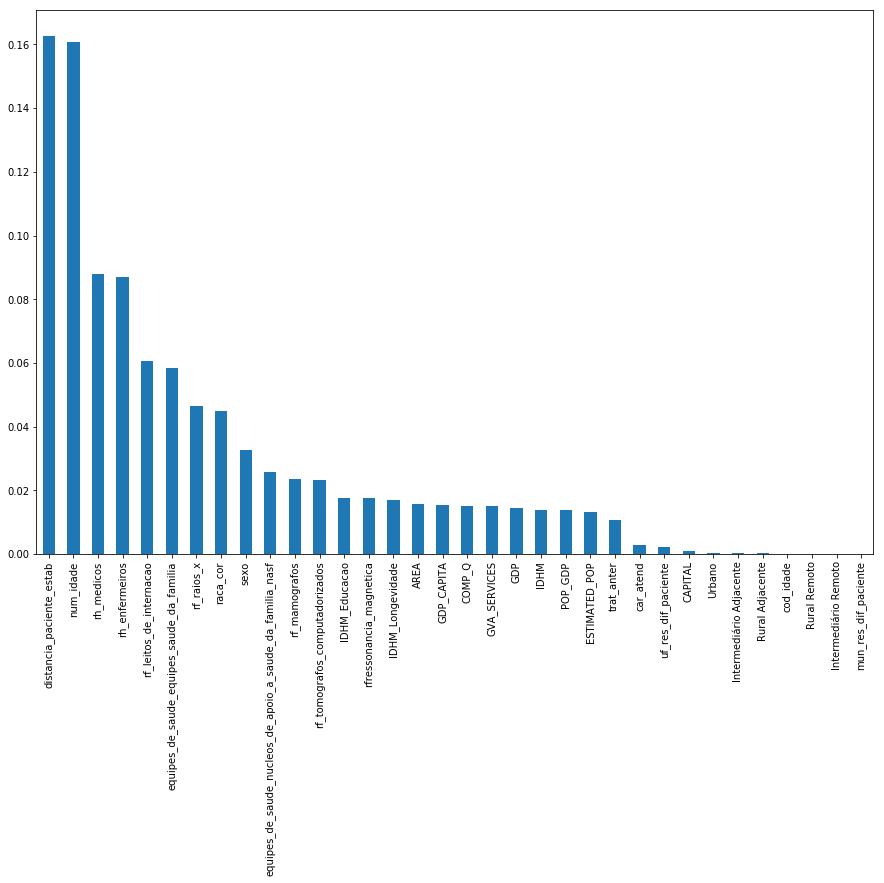

In [243]:
pd.Series(dict(zip(X_train.columns, clf.feature_importances_))).sort_values(ascending=False).plot(kind='bar', figsize=(15, 10))